In [ ]:
#pip install pymysql

In [1]:
import pymysql
import pandas as pd

try:# Establish connection
    conn = pymysql.connect(
    host = 'localhost',
    user = 'root',
    password = '1234',
    database = 'tumor',
    port = 3306
    )
    
    #load data into Dataframe
    query = "SELECT * FROM brain_tumor_dataset"
    df = pd.read_sql(query, conn)
    
    # display results
    print("Connection successful ! Here's your data:")
    display(df.head())
    
except pymysql.Error as e:
    print(f'MySQL Error: {e}')
    
finally:
    if 'conn' in locals():
        conn.close()
        print("Connection closed")

C:\Users\Dell\AppData\Local\Temp\ipykernel_16792\1956215586.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Connection successful ! Here's your data:


,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


Connection closed


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

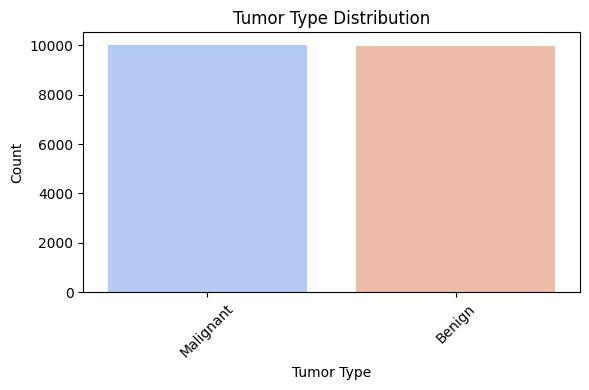

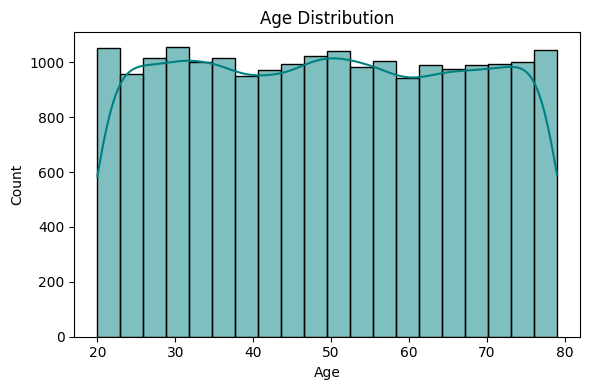

Accuracy:  0.49

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49      1997
           1       0.49      0.47      0.48      2003

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000

Confusion Matrix:
 [[ 996 1001]
 [1057  946]]
✅ Model saved as 'random_forest_classifier.joblib'


In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
#import pickle
import joblib

# drop irrelevant columns
df = df.drop(columns = ['Patient_ID'])

#-----------EDA---------------

# plot tumor type distribution
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'Tumor_Type', palette = 'coolwarm')
plt.title("Tumor Type Distribution")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# plot distribution of age
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins = 20, kde = True, color = "teal")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()


# -------------Label Encoding -----------
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
        
# Define features and target
X = df.drop("Tumor_Type", axis = 1)
y = df['Tumor_Type']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Train Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred): .2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model
# with open("random_forest_classifier.pkl", "wb") as f:
#     #pickle.dump(clf, f)
joblib.dump(clf, "random_forest_classifier.joblib")

print("✅ Model saved as 'random_forest_classifier.joblib'")

    
# print("✅ Model saved as 'random_forest_classifier.pkl'")



In [ ]:
pip show scikit-learn

In [ ]:
pip install --upgrade scikit-learn
